**analyse_ptx.ipynb: This notebook contains all of the analysis of the AI model and CXR data used for our research letter and produces the charts utilised in the figure.**

In [15]:
from scripts.analyse_model import *

import warnings
warnings.filterwarnings('ignore')

# Ptx Detection Model Evaluation

In [16]:
all_ds = ModelEval("all_holdout")

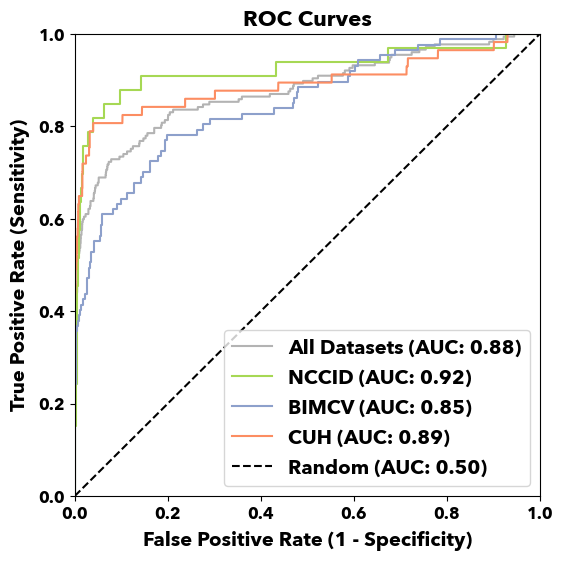

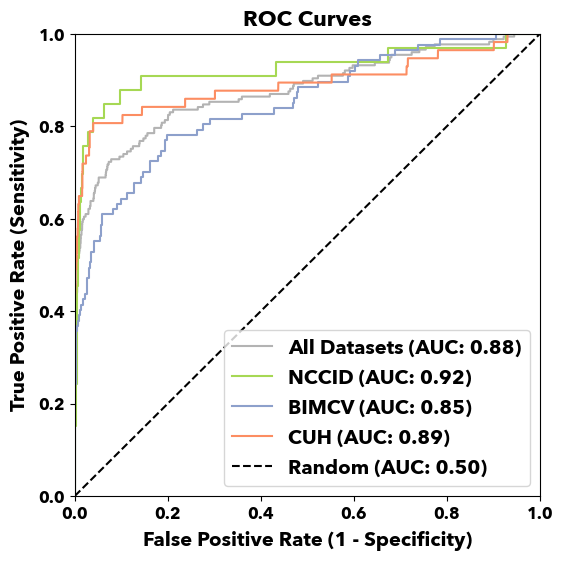

In [17]:
# all_ds.roc_curve()[0].savefig('roc_curves.png')
all_ds.roc_curve()[0]

(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='Recall', ylabel='Precision'>)

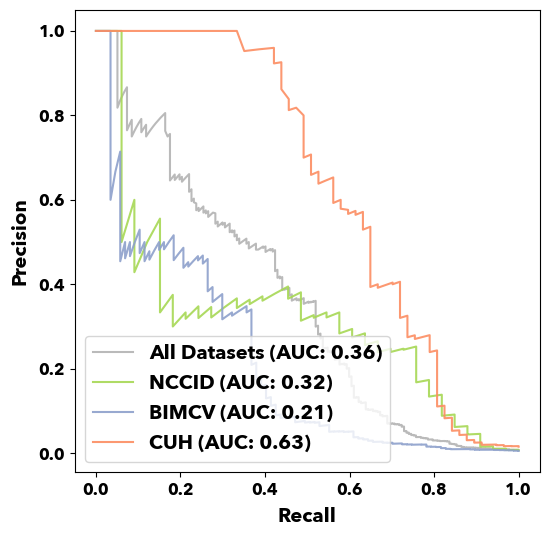

In [18]:
# all_ds.pr_curve()[0].savefig('pr_curves.png')
all_ds.pr_curve()

In [19]:
full_results, reduced_results = all_ds.make_article_tables()

In [20]:
full_results.to_csv('full_results.csv')
full_results

All Datasets              NCCID              BIMCV  \
n (Ptx)           24,662 (177)         4,440 (33)        16,548 (87)   
Accuracy     0.99 [0.99, 0.99]  0.99 [0.98, 0.99]  0.99 [0.99, 0.99]   
AUROC        0.88 [0.85, 0.91]  0.92 [0.84, 0.98]  0.85 [0.80, 0.89]   
Sensitivity  0.00 [0.00, 0.00]  0.61 [0.42, 0.78]  0.37 [0.27, 0.47]   
Specificity  1.00 [1.00, 1.00]  0.99 [0.98, 0.99]  0.99 [0.99, 0.99]   
PPV          0.00 [0.00, 0.00]  0.27 [0.17, 0.38]  0.23 [0.16, 0.30]   
NPV          0.99 [0.99, 0.99]  1.00 [1.00, 1.00]  1.00 [1.00, 1.00]   
F1 Score     0.00 [0.00, 0.00]  0.37 [0.25, 0.49]  0.28 [0.21, 0.36]   
AUPRC        0.37 [0.29, 0.44]  0.34 [0.19, 0.49]  0.22 [0.14, 0.32]   

                           CUH  
n (Ptx)             3,674 (57)  
Accuracy     0.97 [0.97, 0.98]  
AUROC        0.89 [0.83, 0.95]  
Sensitivity  0.74 [0.61, 0.85]  
Specificity  0.98 [0.97, 0.98]  
PPV          0.32 [0.24, 0.40]  
NPV          1.00 [0.99, 1.00]  
F1 Score     0.44 [0.36, 0.53]  
AUPRC        0.64 [0.51, 0.75]

In [14]:
# print(reduced_results.style.to_latex())
reduced_results

All Datasets
n (Ptx)           24,662 (177)
Accuracy     0.99 [0.99, 0.99]
AUROC        0.88 [0.84, 0.91]
Sensitivity  0.00 [0.00, 0.00]
Specificity  1.00 [1.00, 1.00]
PPV          0.00 [0.00, 0.00]
NPV          0.99 [0.99, 0.99]
F1 Score     0.00 [0.00, 0.00]
AUPRC        0.36 [0.28, 0.44]

# Inference Demographics and COVID-Ptx Incidence Calculation

In [22]:
inf = InferenceEval("all_holdout", covid_status='positive')

### Tables of Demographics

In [23]:
inf.make_demogs_table(stage="Full Dataset")

bimcv           cuh          nccid  \
Subset       index                                                         
Full Dataset No. of CXRs             16,548         3,662         15,617   
             No. of Patients          4,636         1,437          4,455   
             Male / Female    2,372 / 2,264     739 / 698  2,454 / 2,001   
             Mean Age (IQR)    62.2 (50-76)  67.8 (54-84)   67.0 (55-81)   

                                    ricord    all_holdout  
Subset       index                                         
Full Dataset No. of CXRs             1,264         37,103  
             No. of Patients           361         10,889  
             Male / Female       213 / 148  5,778 / 5,111  
             Mean Age (IQR)   55.7 (43-69)   64.7 (52-79)

In [24]:
inf.make_demogs_table(stage="COVID-positive")

bimcv           cuh          nccid  \
Subset         index                                                         
COVID-positive No. of CXRs             15,527         1,926          5,123   
               No. of Patients          4,402           480          2,305   
               Male / Female    2,269 / 2,133     286 / 194  1,302 / 1,003   
               Mean Age (IQR)    63.0 (51-77)  69.4 (57-84)   67.4 (54-82)   

                                      ricord    all_holdout  
Subset         index                                         
COVID-positive No. of CXRs             1,157         23,733  
               No. of Patients           355          7,542  
               Male / Female       210 / 145  4,067 / 3,475  
               Mean Age (IQR)   56.4 (44-69)   64.5 (52-79)

In [25]:
inf.make_demogs_table(stage="Pthx Confirmed")

bimcv           cuh         nccid  \
Subset         index                                                       
Pthx Confirmed No. of CXRs                55            32            39   
               No. of Patients            29             6            17   
               Male / Female         19 / 10         2 / 4        11 / 6   
               Mean Age (IQR)   67.1 (62-75)  71.5 (69-76)  67.9 (57-84)   

                                      ricord   all_holdout  
Subset         index                                        
Pthx Confirmed No. of CXRs                13           139  
               No. of Patients             5            57  
               Male / Female           4 / 1       36 / 21  
               Mean Age (IQR)   69.6 (58-77)  68.0 (62-77)

In [26]:
tables = []

for stage in ["Full Dataset", "COVID-positive", "Pthx Confirmed"]:
    tables.append(inf.make_demogs_table(stage))

df = pd.concat(tables).rename(PRESENTATION_LABEL_MAP, axis=1)

In [28]:
df.to_csv('demogs.csv')

In [14]:
# df = df.drop(['BIMCV', 'CUH', 'NCCID', 'RICORD'], axis=1)

In [15]:
df

All Datasets
Subset         index                         
COVID-positive No. of CXRs             23,733
               No. of Patients          7,542
               Male / Female    4,067 / 3,475
               Mean Age (IQR)    64.5 (52-79)
Pthx Confirmed No. of CXRs                139
               No. of Patients             57
               Male / Female          36 / 21
               Mean Age (IQR)    68.0 (62-77)

In [16]:
df = df.reset_index().pivot(index='Subset', columns='index', values="All Datasets")
df = df.rename_axis(None, axis=1).rename_axis(None, axis=0)

In [17]:
df = df[['No. of CXRs', 'No. of Patients', 'Male / Female', 'Mean Age (IQR)']]
df = df.transpose()

In [18]:
# print(df.style.to_latex())
df

COVID-positive Pthx Confirmed
No. of CXRs             23,733            139
No. of Patients          7,542             57
Male / Female    4,067 / 3,475        36 / 21
Mean Age (IQR)    64.5 (52-79)   68.0 (62-77)

In [19]:
df[['COVID-positive']]

COVID-positive
No. of CXRs             23,733
No. of Patients          7,542
Male / Female    4,067 / 3,475
Mean Age (IQR)    64.5 (52-79)

In [20]:
# print(df[['Pthx Confirmed']].style.to_latex())
df[['Pthx Confirmed']]

Pthx Confirmed
No. of CXRs                139
No. of Patients             57
Male / Female          36 / 21
Mean Age (IQR)    68.0 (62-77)

### Table of Dataset Overview

In [21]:
demogs = inf.make_demogs_table(stage="Full Dataset").drop(index=['Male / Female', "Mean Age (IQR)"], level=1).reset_index(level=0).drop(["all_holdout", "Subset"], axis=1)

In [22]:
demogs.loc['No. of Centres', 'bimcv'] = "11"
demogs.loc['No. of Centres', 'cuh'] = "1"
demogs.loc['No. of Centres', 'ricord'] = "4"
demogs.loc['No. of Centres', 'nccid'] = "10"

demogs.loc['Countries', 'bimcv'] = "Spain"
demogs.loc['Countries', 'cuh'] = "UK"
demogs.loc['Countries', 'ricord'] = "US,CA,BR,TR"
demogs.loc['Countries', 'nccid'] = "UK"

In [23]:
demogs = demogs.rename({row: row.replace("No. of ", "") for row in demogs.index.tolist()}, axis=0)


In [24]:
demogs = demogs.rename(PRESENTATION_LABEL_MAP, axis=1)

In [25]:
# print(demogs.style.to_latex())
demogs

BIMCV    CUH   NCCID       RICORD
index                                        
CXRs       16,548  3,662  15,617        1,264
Patients    4,636  1,437   4,455          361
Centres        11      1      10            4
Countries   Spain     UK      UK  US,CA,BR,TR

### Incidence Calculations

In [26]:
inf.results_df

All Datasets              NCCID  \
incidence_original                1.95 [1.62, 2.25]  1.74 [1.21, 2.30]   
incidence_confirmed_cases         0.76 [0.56, 0.97]  0.74 [0.39, 1.13]   
adjusted_incidence_bootstrapping  1.02 [0.75, 1.31]  0.99 [0.53, 1.52]   

                                              BIMCV                CUH  \
incidence_original                1.44 [1.09, 1.79]  7.49 [5.21, 9.79]   
incidence_confirmed_cases         0.66 [0.43, 0.91]  1.25 [0.42, 2.29]   
adjusted_incidence_bootstrapping  0.90 [0.58, 1.23]  1.69 [0.56, 3.10]   

                                             RICORD  
incidence_original                2.27 [0.85, 3.94]  
incidence_confirmed_cases         1.41 [0.28, 2.82]  
adjusted_incidence_bootstrapping  1.90 [0.38, 3.81]

# Analysis of Confirmed COVID-Ptx Patients

In [27]:
analysis = AnalysePositiveCases('all_holdout')

In [28]:
len(analysis.all_scans['all_holdout'])

139

## Sex

In [29]:
analysis.make_cis_for_stats(analysis.datasets['all_holdout'], 'sex', "M")

The percentage of M patients is 63.2% with a 95% confidence interval of (50.6%, 75.7%)


(0.5063500128224112, 0.7568078819144308)

<Axes: xlabel='Sex', ylabel='Count'>

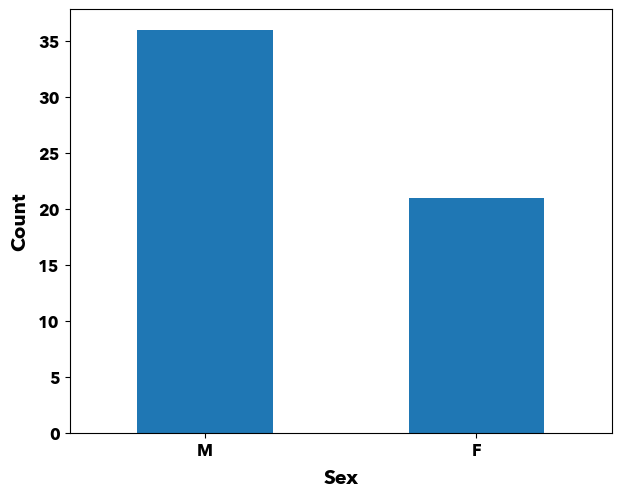

In [30]:
analysis.datasets['all_holdout'].sex.value_counts().plot(kind='bar', rot=0, xlabel='Sex', ylabel='Count')

## Age

In [31]:
analysis.make_cis_for_stats(analysis.datasets['all_holdout'], 'age', 50)

The percentage of patients aged 50 or over is 91.2% with a 95% confidence interval of (83.9%, 98.6%)


(0.8388410748530006, 0.9857203286557712)

<Axes: xlabel='Age', ylabel='Count'>

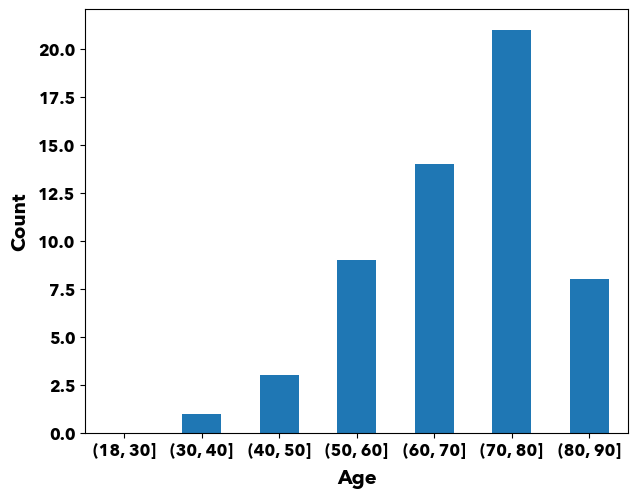

In [32]:
bins = [18, 30, 40, 50, 60, 70, 80, 90]

analysis.datasets['all_holdout']['age_bins'] = pd.cut(analysis.datasets['all_holdout']['age'], bins)

analysis.datasets['all_holdout']['age_bins'].value_counts(sort=False).plot(kind='bar', rot=0, xlabel='Age', ylabel='Count')

## Ethnicity

In [33]:
analysis.make_cis_for_stats(analysis.datasets['all_holdout'], 'ethnicity', 'White')

The percentage of White patients is 65.2% with a 95% confidence interval of (45.8%, 84.7%)


(0.4575236744675626, 0.846824151619394)

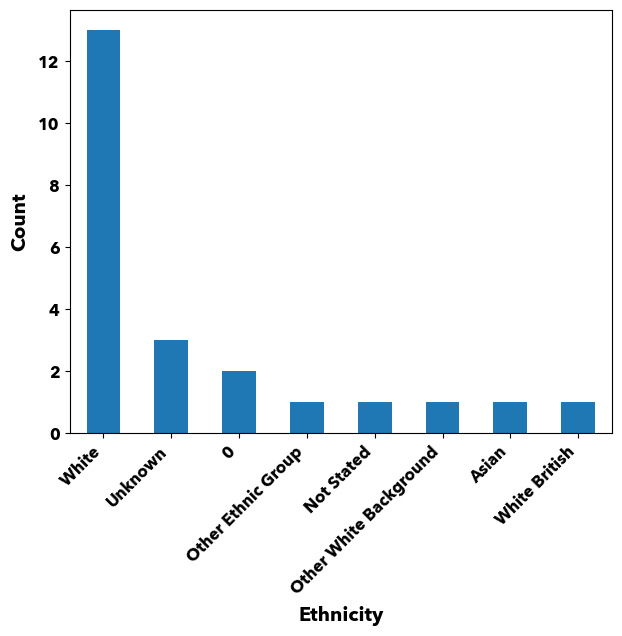

In [34]:
analysis.datasets['all_holdout'].ethnicity.value_counts().plot(kind='bar', rot=45, xlabel='Ethnicity', ylabel='Count')
_ = plt.xticks(horizontalalignment='right')

## Test - Scan Interval

Text(0.5, 1.0, '')

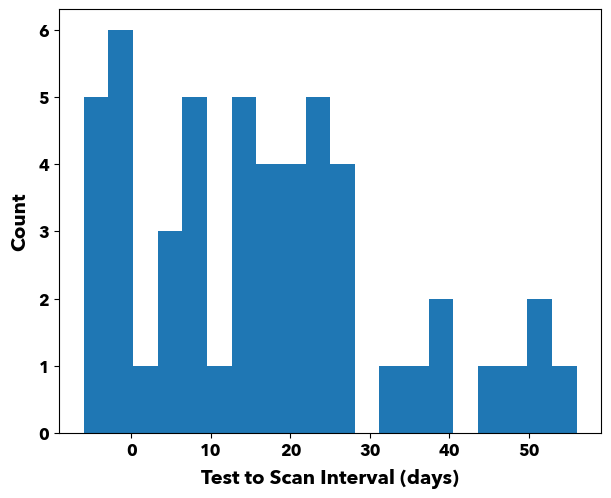

In [35]:
analysis.datasets['all_holdout'].hist("scan_test_interval_float", bins=20, grid=False)
plt.xlabel("Test to Scan Interval (days)")
plt.ylabel("Count")
plt.title("")

## COVID Severity

<Axes: xlabel='COVID Severity', ylabel='Count'>

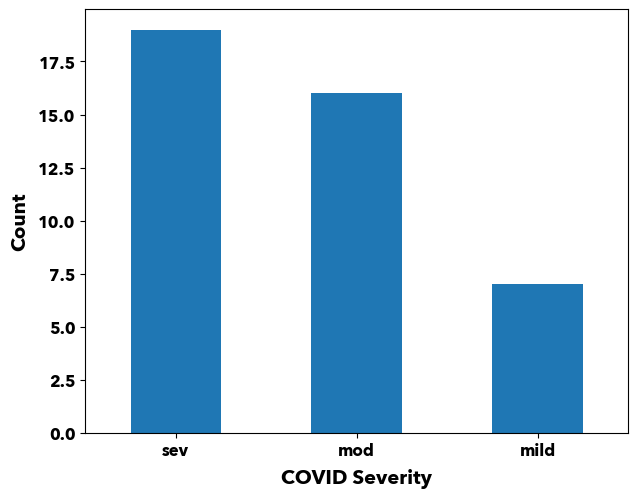

In [36]:
analysis.datasets['all_holdout'].covid_severity.value_counts().plot(kind='bar', rot=0, xlabel='COVID Severity', ylabel='Count')

## Intubation

In [37]:
analysis.make_cis_for_stats(analysis.datasets['all_holdout'], 'intubated', 'Y')

The percentage of Y patients is 50.0% with a 95% confidence interval of (36.7%, 63.3%)


(0.36663889178180475, 0.6333611082181952)

<Axes: xlabel='Intubated?', ylabel='Count'>

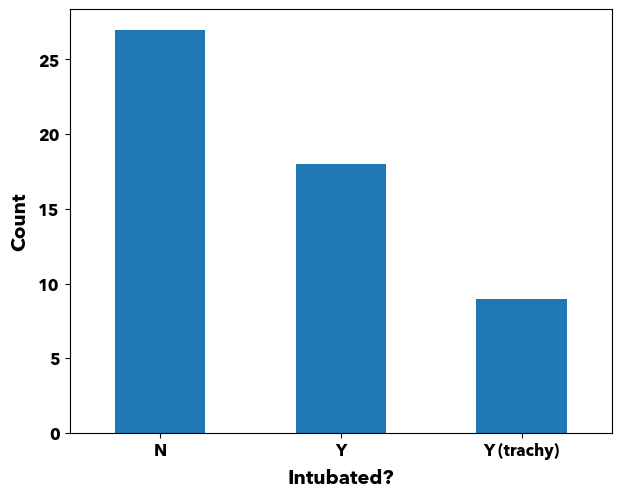

In [38]:
analysis.datasets['all_holdout'].intubated.value_counts().plot(kind='bar', rot=0, xlabel='Intubated?', ylabel='Count')

## PPV vs. non-PPV

(<Figure size 500x600 with 2 Axes>,
 array([<Axes: xlabel='Age', ylabel='No. of Patients'>,
        <Axes: xlabel='Interval between 1st Positive COVID-19 Test\nand 1st Imaging of Pneumothorax (days)', ylabel='No. of Patients'>],
       dtype=object))

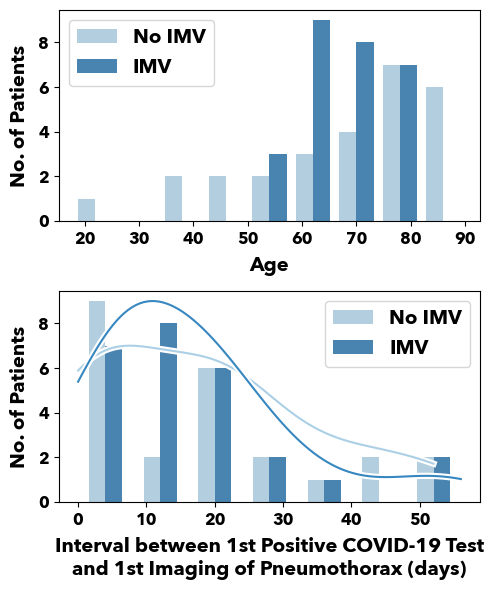

In [39]:
analysis.make_age_timeint_charts()

(<Figure size 400x600 with 2 Axes>,
 array([<Axes: xlabel='Sex or Gender', ylabel='No. of Patients'>,
        <Axes: xlabel='Radiographic COVID-19\nSeverity', ylabel='No. of Patients'>],
       dtype=object))

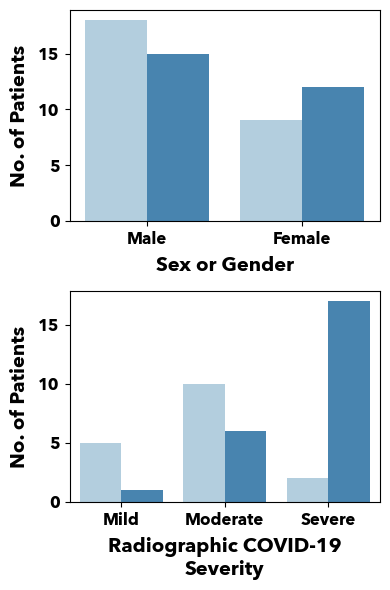

In [40]:
analysis.make_sex_severity_charts()

In [41]:
ppv = analysis.datasets['all_holdout'][analysis.datasets['all_holdout'].intubated.notna() & (analysis.datasets['all_holdout'].intubated.str.contains("Y"))]
non_ppv = analysis.datasets['all_holdout'][analysis.datasets['all_holdout'].intubated.notna() & (analysis.datasets['all_holdout'].intubated.str.contains("N"))]

In [42]:
analysis.make_cis_for_stats(ppv, 'covid_severity', 'sev')

The percentage of sev patients is 70.8% with a 95% confidence interval of (52.6%, 89.0%)


(0.5264835912281995, 0.8901830754384672)

In [43]:
analysis.make_cis_for_stats(non_ppv, 'covid_severity', 'sev')

The percentage of sev patients is 11.8% with a 95% confidence interval of (-3.6%, 27.1%)


(-0.03551222138164001, 0.27080633902869883)

In [44]:
analysis.perform_categorical_ttest(non_ppv, ppv, 'covid_severity', 'sev')

z-score = -3.737, p = 0.00019


In [45]:
analysis.perform_ppv_time_int_numeric_ttest(analysis.datasets['all_holdout'], remove_lt0=False)

non-PPV time interval mean = 16.654 days, with a 95% confidence interval of (11.22, 22.08)), and std = 13.728 days, n = 27
non-PPV time interval mean = 18.000 days, with a 95% confidence interval of (11.86, 24.14)), and std = 15.519 days, n = 27
t = -0.338, p = 0.737


(-0.3375988611824469, 0.7370245551161618)

In [46]:
analysis.perform_ppv_time_int_numeric_ttest(analysis.datasets['all_holdout'], remove_lt0=True)

non-PPV time interval mean = 18.083 days, with a 95% confidence interval of (12.46, 23.71)), and std = 13.326 days, n = 24
non-PPV time interval mean = 27.267 days, with a 95% confidence interval of (20.39, 34.14)), and std = 12.412 days, n = 15
t = -2.148, p = 0.038


(-2.1482687481227103, 0.03830696067781466)